In [1]:
from Database import Database
import sys
# import multiprocessing as mp
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
path_file = "D:/Hanze_Groningen/STAGE/eQTL/distance_eqtl_ALL.tsv"
df = pd.read_csv(path_file, sep='\t')
df = df.sort_values('distance')
df

,SNP_eQTL,chr,pos,Gene,snp_ID,chr_snp,pos_snp,distance
0,rs12230244,12,10117369,ENSG00000172322,11634344,12,10117369,0.0
8323,rs28606005,17,40397776,ENSG00000131480,11983470,17,40397776,0.0
8315,rs11878573,19,8079081,ENSG00000066044,10745787,19,8079081,0.0
8314,rs7246259,19,36432941,ENSG00000105290,11994064,19,36432941,0.0
8312,rs4606419,10,98747114,ENSG00000155640,11103068,10,98747114,0.0
...,...,...,...,...,...,...,...,...
7815,rs2180957,14,69168821,ENSG00000258623,1242927,14,69167948,873.0
14153,rs2285814,16,3565123,ENSG00000103351,5881673,16,3566052,929.0
6202,rs185683715,6,10902087,ENSG00000137434,7629313,6,10901112,975.0
5253,rs3820618,1,40223128,ENSG00000198754,20418487,1,40224375,1247.0


In [3]:
nul = df[(df["distance"]<1)]
nul.to_csv(f"D:/Hanze_Groningen/STAGE/R/eQTL_zero_distance.tsv", sep='\t', encoding='utf-8', index=False)
nul

,SNP_eQTL,chr,pos,Gene,snp_ID,chr_snp,pos_snp,distance
0,rs12230244,12,10117369,ENSG00000172322,11634344,12,10117369,0.0
8323,rs28606005,17,40397776,ENSG00000131480,11983470,17,40397776,0.0
8315,rs11878573,19,8079081,ENSG00000066044,10745787,19,8079081,0.0
8314,rs7246259,19,36432941,ENSG00000105290,11994064,19,36432941,0.0
8312,rs4606419,10,98747114,ENSG00000155640,11103068,10,98747114,0.0
...,...,...,...,...,...,...,...,...
9,rs3822263,4,6697673,ENSG00000163993,10677254,4,6697673,0.0
3,rs2431321,5,102118794,ENSG00000145730,10888735,5,102118794,0.0
434,rs535801,11,94212048,ENSG00000020922,10294805,11,94212048,0.0
3300,rs2286672,17,4712617,ENSG00000142507,10230298,17,4712617,0.0


In [4]:
path_db = 'D:/Hanze_Groningen/STAGE/db_laatste_copy.db' #'D:/Hanze_Groningen/STAGE/DATAB/copydatabase_C.db'
# Database connection
db = Database(path_db)


In [28]:
len(set(df['snp_ID']))
snp_ID = list(set(df['snp_ID']))

In [8]:
database_df = pd.read_sql('''SELECT project.cancer, sum_dosage_GT.donor_project_ID, 
                            sum_dosage_GT.donor_ID, sum_dosage_GT.snp_ID, 
                            snp.chr, snp.pos_start, snp.pos_end 
                    FROM project, sum_dosage_GT, snp 
                    WHERE sum_dosage_GT.snp_ID=snp.ID AND 
                              sum_dosage_GT.donor_project_ID = project.ID AND 
                              (sum_dosage_GT.GT2 = 1 OR sum_dosage_GT.GT2 = 2) AND 
                              sum_dosage_GT.total_read_count_sum >= 33;''', db.mydb_connection)

In [9]:
database_df

,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end
0,Head and neck,1,1,2,10,105977264,105977264
1,Head and neck,1,1,13,2,220235789,220235789
2,Head and neck,1,1,17,15,25954365,25954365
3,Head and neck,1,1,23,5,117513900,117513900
4,Head and neck,1,1,31,8,55363870,55363870
...,...,...,...,...,...,...,...
9982581,Mesenchymal,43,2996,21812248,17,46607840,46607840
9982582,Mesenchymal,43,2996,21812249,15,55919246,55919246
9982583,Mesenchymal,43,2996,21812253,17,42926715,42926715
9982584,Mesenchymal,43,2996,21812255,14,105177455,105177455


In [29]:
select_snps_eQTL = database_df[database_df['snp_ID'].isin(snp_ID)]

In [30]:
select_snps_eQTL

,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end
3517,Head and neck,1,3,18619,17,1671295,1671295
4623,Head and neck,1,3,20930,16,84808694,84808694
4978,Head and neck,1,3,21626,15,42186582,42186582
6677,Head and neck,1,4,27481,15,81209363,81209363
10266,Head and neck,1,5,46153,6,99877935,99877935
...,...,...,...,...,...,...,...
9973769,Liver,42,2960,21784540,2,183909546,183909546
9977678,Liver,42,2961,21794680,4,120398274,120398274
9980445,Liver,42,2961,21800876,2,170449516,170449516
9981557,Mesenchymal,43,2967,21810458,5,140024571,140024571


In [31]:
print(set(select_snps_eQTL['cancer']))

{'Gall Bladder', 'Mesenchymal', 'Colorectal', 'Cervix', 'Stomach', 'Liver', 'Bladder', 'Uterus', 'Breast', 'Kidney', 'Brain', 'Bone', 'Ovary', 'Head and neck', 'Blood'}


In [32]:
select_snps_eQTL['snp'] = select_snps_eQTL['chr'] + '_' + select_snps_eQTL['pos_start'].map(str) + '_' + select_snps_eQTL['pos_end'].map(str)
select_snps_eQTL

<ipython-input-32-17253ecaa6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_snps_eQTL['snp'] = select_snps_eQTL['chr'] + '_' + select_snps_eQTL['pos_start'].map(str) + '_' + select_snps_eQTL['pos_end'].map(str)


,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end,snp
3517,Head and neck,1,3,18619,17,1671295,1671295,17_1671295_1671295
4623,Head and neck,1,3,20930,16,84808694,84808694,16_84808694_84808694
4978,Head and neck,1,3,21626,15,42186582,42186582,15_42186582_42186582
6677,Head and neck,1,4,27481,15,81209363,81209363,15_81209363_81209363
10266,Head and neck,1,5,46153,6,99877935,99877935,6_99877935_99877935
...,...,...,...,...,...,...,...,...
9973769,Liver,42,2960,21784540,2,183909546,183909546,2_183909546_183909546
9977678,Liver,42,2961,21794680,4,120398274,120398274,4_120398274_120398274
9980445,Liver,42,2961,21800876,2,170449516,170449516,2_170449516_170449516
9981557,Mesenchymal,43,2967,21810458,5,140024571,140024571,5_140024571_140024571


In [37]:
snps_eQTL_dict = dict(Counter(list(select_snps_eQTL['snp'])))

snps_eQTL_count_df = pd.DataFrame([snps_eQTL_dict.keys(), snps_eQTL_dict.values()]).T
snps_eQTL_count_df.columns= ['snp', 'counts']
max_eQTL_count = snps_eQTL_count_df['counts'].max()
snps_eQTL_count_df

,snp,counts
0,17_1671295_1671295,1
1,16_84808694_84808694,1
2,15_42186582_42186582,1
3,15_81209363_81209363,1
4,6_99877935_99877935,1
...,...,...
7092,2_183909546_183909546,1
7093,4_120398274_120398274,1
7094,2_170449516_170449516,1
7095,5_140024571_140024571,1


In [39]:
breast_cancer = select_snps_eQTL.loc[select_snps_eQTL['cancer'] == 'Breast']
# breast_cancer

num_donor_breast = len(list(set(breast_cancer['donor_ID'])))

breast_dict = dict(Counter(list(breast_cancer['snp'])))

breast_snp_count_df = pd.DataFrame([breast_dict.keys(), breast_dict.values()]).T
breast_snp_count_df.columns= ['snp', 'counts']
max_breast = breast_snp_count_df['counts'].max()
print(breast_snp_count_df['counts'].max())

sort_breast_snp_count_df = breast_snp_count_df.sort_values('counts', ascending=False)

sort_breast_snp_count_df.rename(columns={'counts': 'counts_breast'}, inplace=True)
sort_breast_snp_count_df.to_csv(f"D:/Hanze_Groningen/STAGE/R/breast_snp_count_eQTL_all.tsv", sep='\t', encoding='utf-8', index=False)
sort_breast_snp_count_df

1


,snp,counts_breast
0,19_6346652_6346652,1
74,3_167574298_167574298,1
86,3_4943543_4943543,1
85,2_88990894_88990894,1
84,2_172813091_172813091,1
...,...,...
35,4_142225709_142225709,1
34,8_145733931_145733931,1
33,1_26298142_26298142,1
32,5_1317440_1317440,1


In [40]:
merge_eQTL_b = breast_cancer.merge(sort_breast_snp_count_df, on=['snp'], how='outer')
merge_eQTL_b.to_csv(f"D:/Hanze_Groningen/STAGE/R/breast_snp_count_eQTL_distance_all.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL_b

,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end,snp,counts_breast
0,Breast,25,1358,4103110,19,6346652,6346652,19_6346652_6346652,1
1,Breast,25,1406,4408424,4,184575370,184575370,4_184575370_184575370,1
2,Breast,25,1406,4409622,3,9777021,9777021,3_9777021_9777021,1
3,Breast,25,1406,4409938,7,30584633,30584633,7_30584633_30584633,1
4,Breast,25,1408,4420114,17,78676919,78676919,17_78676919_78676919,1
...,...,...,...,...,...,...,...,...,...
112,Breast,28,1997,8734673,11,65389721,65389721,11_65389721_65389721,1
113,Breast,28,2000,8735118,3,46729146,46729146,3_46729146_46729146,1
114,Breast,28,2018,8736757,6,32021406,32021406,6_32021406_32021406,1
115,Breast,28,2022,8737199,9,104184173,104184173,9_104184173_104184173,1


In [42]:
# merge_eQTL = merge_eQTL_b.merge(select_snps_eQTL, on=['snp'], how='outer')
merge_eQTL2 = merge_eQTL_b.merge(df, on=['snp_ID'], how='outer')

merge_eQTL2.to_csv(f"D:/Hanze_Groningen/STAGE/R/breast_snp_count_eQTL_distance_all2.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL2

,cancer,donor_project_ID,donor_ID,snp_ID,chr_x,pos_start,pos_end,snp,counts_breast,SNP_eQTL,chr_y,pos,Gene,chr_snp,pos_snp,distance
0,Breast,25.0,1358.0,4103110,19,6346652.0,6346652.0,19_6346652_6346652,1,rs61354472,19,6346866,ENSG00000125656,19,6346652,214.0
1,Breast,25.0,1406.0,4408424,4,184575370.0,184575370.0,4_184575370_184575370,1,rs9790676,4,184575568,ENSG00000182552,4,184575370,198.0
2,Breast,25.0,1406.0,4409622,3,9777021.0,9777021.0,3_9777021_9777021,1,rs159159,3,9777158,ENSG00000241553,3,9777021,137.0
3,Breast,25.0,1406.0,4409938,7,30584633.0,30584633.0,7_30584633_30584633,1,rs38464,7,30584675,ENSG00000226874,7,30584633,42.0
4,Breast,25.0,1408.0,4420114,17,78676919.0,78676919.0,17_78676919_78676919,1,rs4062178,17,78676905,ENSG00000141564,17,78676919,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16982,NaN,NaN,NaN,1242927,NaN,NaN,NaN,NaN,NaN,rs2180957,14,69168821,ENSG00000258623,14,69167948,873.0
16983,NaN,NaN,NaN,5881673,NaN,NaN,NaN,NaN,NaN,rs2285814,16,3565123,ENSG00000103351,16,3566052,929.0
16984,NaN,NaN,NaN,7629313,NaN,NaN,NaN,NaN,NaN,rs185683715,6,10902087,ENSG00000137434,6,10901112,975.0
16985,NaN,NaN,NaN,20418487,NaN,NaN,NaN,NaN,NaN,rs3820618,1,40223128,ENSG00000198754,1,40224375,1247.0


In [43]:
nonbreast_cancer = select_snps_eQTL.loc[select_snps_eQTL['cancer'] != 'Breast']

num_donor_nonbreast = len(list(set(nonbreast_cancer['donor_ID'])))

nonbreast_dict = dict(Counter(list(nonbreast_cancer['snp'])))

nonbreast_snp_count_df = pd.DataFrame([nonbreast_dict.keys(), nonbreast_dict.values()]).T
nonbreast_snp_count_df.columns= ['snp', 'counts']

max_nonbreast = nonbreast_snp_count_df['counts'].max()
print(nonbreast_snp_count_df['counts'].max())

sort_nonbreast_snp_count_df = nonbreast_snp_count_df.sort_values('counts', ascending=False)

sort_nonbreast_snp_count_df.rename(columns={'counts': 'counts_nonbreast'}, inplace=True)
sort_nonbreast_snp_count_df.to_csv(f"D:/Hanze_Groningen/STAGE/R/nonbreast_snp_count_eQTL_all.tsv", sep='\t', encoding='utf-8', index=False)
sort_nonbreast_snp_count_df

7


,snp,counts_nonbreast
850,15_57103754_57103754,7
1836,6_44134581_44134581,6
1717,7_128142023_128142023,6
1639,19_17544165_17544165,6
1653,2_219267781_219267781,6
...,...,...
2869,4_154277323_154277323,1
2868,2_201641045_201641045,1
2867,15_80126521_80126521,1
2864,15_68409260_68409260,1


In [44]:
merge_eQTL_nb = breast_cancer.merge(sort_breast_snp_count_df, on=['snp'], how='outer')
merge_eQTL_nb.to_csv(f"D:/Hanze_Groningen/STAGE/R/nonbreast_snp_count_eQTL_distance_all.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL_nb

,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end,snp,counts_breast
0,Breast,25,1358,4103110,19,6346652,6346652,19_6346652_6346652,1
1,Breast,25,1406,4408424,4,184575370,184575370,4_184575370_184575370,1
2,Breast,25,1406,4409622,3,9777021,9777021,3_9777021_9777021,1
3,Breast,25,1406,4409938,7,30584633,30584633,7_30584633_30584633,1
4,Breast,25,1408,4420114,17,78676919,78676919,17_78676919_78676919,1
...,...,...,...,...,...,...,...,...,...
112,Breast,28,1997,8734673,11,65389721,65389721,11_65389721_65389721,1
113,Breast,28,2000,8735118,3,46729146,46729146,3_46729146_46729146,1
114,Breast,28,2018,8736757,6,32021406,32021406,6_32021406_32021406,1
115,Breast,28,2022,8737199,9,104184173,104184173,9_104184173_104184173,1


In [45]:
# merge_eQTL = merge_eQTL_b.merge(select_snps_eQTL, on=['snp'], how='outer')
merge_eQTL2 = merge_eQTL_nb.merge(df, on=['snp_ID'], how='outer')

merge_eQTL2.to_csv(f"D:/Hanze_Groningen/STAGE/R/nonbreast_snp_count_eQTL_distance_all2.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL2

,cancer,donor_project_ID,donor_ID,snp_ID,chr_x,pos_start,pos_end,snp,counts_breast,SNP_eQTL,chr_y,pos,Gene,chr_snp,pos_snp,distance
0,Breast,25.0,1358.0,4103110,19,6346652.0,6346652.0,19_6346652_6346652,1,rs61354472,19,6346866,ENSG00000125656,19,6346652,214.0
1,Breast,25.0,1406.0,4408424,4,184575370.0,184575370.0,4_184575370_184575370,1,rs9790676,4,184575568,ENSG00000182552,4,184575370,198.0
2,Breast,25.0,1406.0,4409622,3,9777021.0,9777021.0,3_9777021_9777021,1,rs159159,3,9777158,ENSG00000241553,3,9777021,137.0
3,Breast,25.0,1406.0,4409938,7,30584633.0,30584633.0,7_30584633_30584633,1,rs38464,7,30584675,ENSG00000226874,7,30584633,42.0
4,Breast,25.0,1408.0,4420114,17,78676919.0,78676919.0,17_78676919_78676919,1,rs4062178,17,78676905,ENSG00000141564,17,78676919,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16982,NaN,NaN,NaN,1242927,NaN,NaN,NaN,NaN,NaN,rs2180957,14,69168821,ENSG00000258623,14,69167948,873.0
16983,NaN,NaN,NaN,5881673,NaN,NaN,NaN,NaN,NaN,rs2285814,16,3565123,ENSG00000103351,16,3566052,929.0
16984,NaN,NaN,NaN,7629313,NaN,NaN,NaN,NaN,NaN,rs185683715,6,10902087,ENSG00000137434,6,10901112,975.0
16985,NaN,NaN,NaN,20418487,NaN,NaN,NaN,NaN,NaN,rs3820618,1,40223128,ENSG00000198754,1,40224375,1247.0


In [35]:
merge_eQTL = snps_eQTL_count_df.merge(select_snps_eQTL, on=['snp'], how='outer')
merge_eQTL.to_csv(f"D:/Hanze_Groningen/STAGE/R/both_snp_count_eQTL_distance_all.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL

,snp,counts,cancer,donor_project_ID,donor_ID,snp_ID,chr_x,pos_start,pos_end,SNP_eQTL,chr_y,pos,Gene,chr_snp,pos_snp,distance
0,17_1671295_1671295,1,Head and neck,1.0,3.0,18619,17,1671295.0,1671295.0,rs12943466,17,1671272,ENSG00000132386,17,1671295,23.0
1,16_84808694_84808694,1,Head and neck,1.0,3.0,20930,16,84808694.0,84808694.0,rs2303231,16,84808622,ENSG00000103194,16,84808694,72.0
2,15_42186582_42186582,1,Head and neck,1.0,3.0,21626,15,42186582.0,42186582.0,rs75030308,15,42186575,ENSG00000174171,15,42186582,7.0
3,15_81209363_81209363,1,Head and neck,1.0,4.0,27481,15,81209363.0,81209363.0,rs1507661,15,81209297,ENSG00000103888,15,81209363,66.0
4,6_99877935_99877935,1,Head and neck,1.0,5.0,46153,6,99877935.0,99877935.0,rs9389367,6,99877793,ENSG00000132424,6,99877935,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19355,NaN,NaN,NaN,NaN,NaN,6028540,NaN,NaN,NaN,rs6766693,3,69120074,ENSG00000144744,3,69120920,846.0
19356,NaN,NaN,NaN,NaN,NaN,5226943,NaN,NaN,NaN,rs6827269,4,54320617,ENSG00000072201,4,54321468,851.0
19357,NaN,NaN,NaN,NaN,NaN,5881673,NaN,NaN,NaN,rs2285814,16,3565123,ENSG00000103351,16,3566052,929.0
19358,NaN,NaN,NaN,NaN,NaN,7629313,NaN,NaN,NaN,rs185683715,6,10902087,ENSG00000137434,6,10901112,975.0


In [36]:
merge_eQTL = snps_eQTL_count_df.merge(select_snps_eQTL, on=['snp'], how='outer')
merge_eQTL2 = merge_eQTL.merge(df, on=['snp_ID'], how='outer')

merge_eQTL2.to_csv(f"D:/Hanze_Groningen/STAGE/R/both_snp_count_eQTL_distance_all2.tsv", sep='\t', encoding='utf-8', index=False)
merge_eQTL2

,snp,counts,cancer,donor_project_ID,donor_ID,snp_ID,chr,pos_start,pos_end
0,17_1671295_1671295,1,Head and neck,1,3,18619,17,1671295,1671295
1,16_84808694_84808694,1,Head and neck,1,3,20930,16,84808694,84808694
2,15_42186582_42186582,1,Head and neck,1,3,21626,15,42186582,42186582
3,15_81209363_81209363,1,Head and neck,1,4,27481,15,81209363,81209363
4,6_99877935_99877935,1,Head and neck,1,5,46153,6,99877935,99877935
...,...,...,...,...,...,...,...,...,...
9323,2_183909546_183909546,1,Liver,42,2960,21784540,2,183909546,183909546
9324,4_120398274_120398274,1,Liver,42,2961,21794680,4,120398274,120398274
9325,2_170449516_170449516,1,Liver,42,2961,21800876,2,170449516,170449516
9326,5_140024571_140024571,1,Mesenchymal,43,2967,21810458,5,140024571,140024571


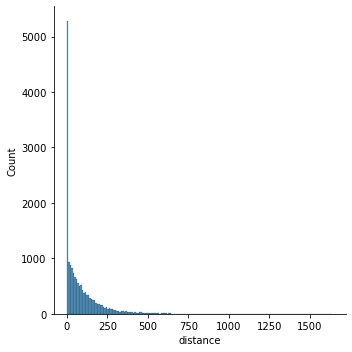

<Figure size 432x288 with 0 Axes>

In [24]:
ax = sns.displot(df['distance']) #.set(xlabel=cancer_type, title='Number of snps in region of 1000000bp')
plt.show()
# plt.savefig(f'{path_file}{type_plot}_{cancer_type}_1.png')
plt.clf()

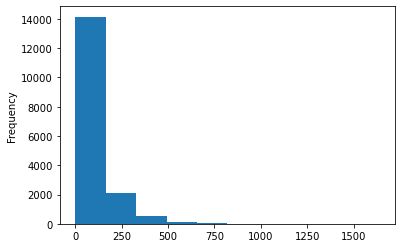

<Figure size 432x288 with 0 Axes>

In [25]:
df['distance'].plot(kind='hist')
plt.show()
# plt.savefig(f'{path_file}{type_plot}_{cancer_type}_1.png')
plt.clf()